In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('blogs.csv', on_bad_lines='skip')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
df.Labels.unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [5]:
df.Labels.value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [6]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

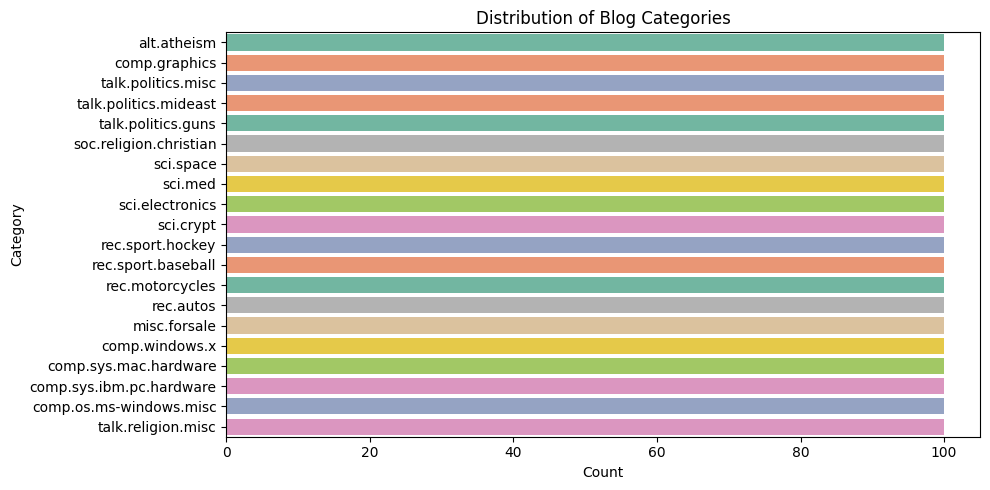

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Labels', order=df['Labels'].value_counts().index, palette='Set2', hue='Labels', legend=False)
plt.title("Distribution of Blog Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [8]:
df.dropna(subset=['Data', 'Labels'], inplace=True)

In [ ]:
# removing leading and trailing characters, then converting empty strings to False and 
# non-empty strings to True.
df = df[df['Data'].str.strip().astype(bool)]

In [10]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import string

In [12]:
stop_words = text.ENGLISH_STOP_WORDS

In [13]:
def preprocess_row(text_input):
    
    # Remove leading/trailing whitespace
    text_clean = text_input.strip()
    # Lowercase the text
    text_clean = text_clean.lower()
    # Remove punctuation
    text_clean = text_clean.translate(str.maketrans('', '', string.punctuation))
    # Tokenize (split by space)
    tokens = text_clean.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back to a string
    return ' '.join(tokens)

# Applying the function row-by-row to the 'Data' column
df['Cleaned_Data'] = df['Data'].astype(str).apply(preprocess_row)

In [14]:
# Display the cleaned data
print(df[['Data', 'Cleaned_Data']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [15]:
df.head()

,Data,Labels,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [16]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3), analyzer='word', norm='l2')
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

Task2: Naive Bayes Model for Text Classification

In [17]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)* 100, 2)}")

                          precision    recall  f1-score   support

             alt.atheism       0.55      0.96      0.70        25
           comp.graphics       0.81      0.90      0.85        29
 comp.os.ms-windows.misc       0.97      0.86      0.91        37
comp.sys.ibm.pc.hardware       0.86      0.84      0.85        38
   comp.sys.mac.hardware       0.92      0.95      0.93        37
          comp.windows.x       1.00      0.88      0.94        43
            misc.forsale       0.63      0.92      0.75        26
               rec.autos       0.96      0.84      0.90        32
         rec.motorcycles       0.61      0.96      0.74        24
      rec.sport.baseball       0.97      0.97      0.97        34
        rec.sport.hockey       0.96      0.96      0.96        28
               sci.crypt       0.88      1.00      0.94        30
         sci.electronics       0.93      0.78      0.85        32
                 sci.med       0.97      0.85      0.91        34
         

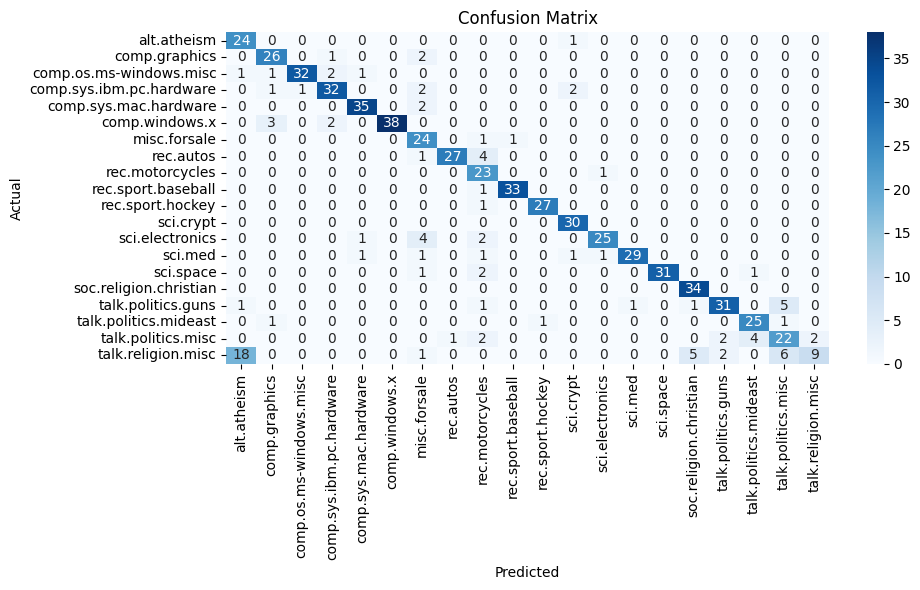

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Task3: Sentiment Analysis

In [23]:
df.head()

,Data,Labels,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [25]:
# Sentiment Function using TextBlob
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [27]:
# Sentiment distribution overall
print("Sentiment Distribution:")
print("\n",df['Sentiment'].value_counts())

Sentiment Distribution:

 Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64


In [28]:
df.head()

,Data,Labels,Cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Neutral
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,Neutral
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Neutral
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Neutral
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,Positive


In [29]:
# Sentiment distribution per category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment Distribution by Category:")
print(sentiment_by_category)


Sentiment Distribution by Category:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61  

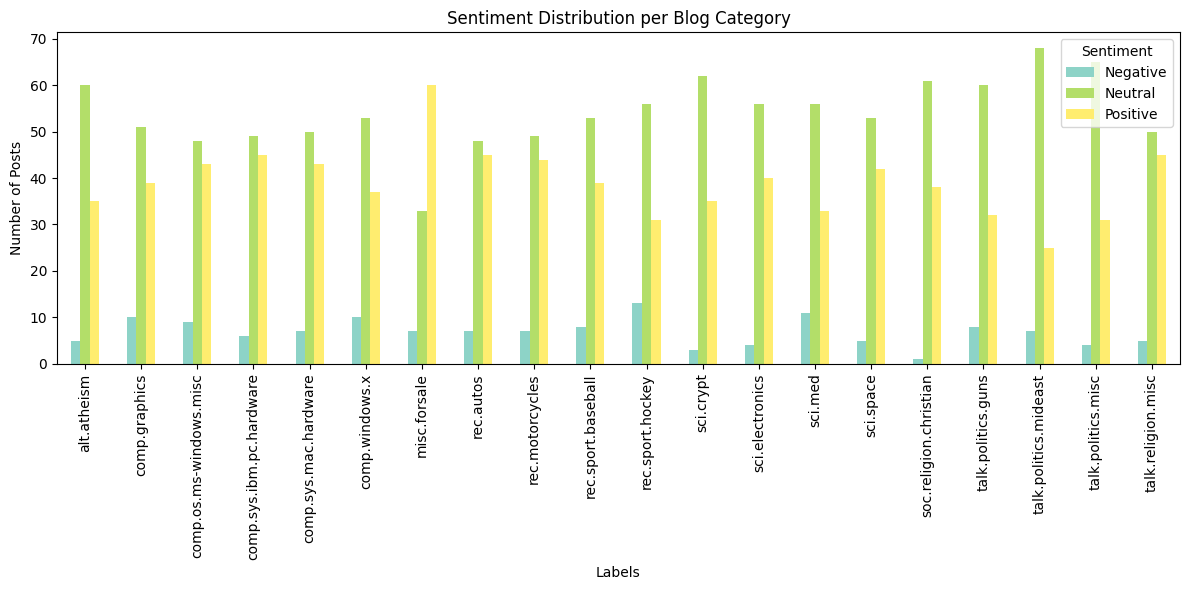

In [30]:
sentiment_by_category.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set3')
plt.title("Sentiment Distribution per Blog Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

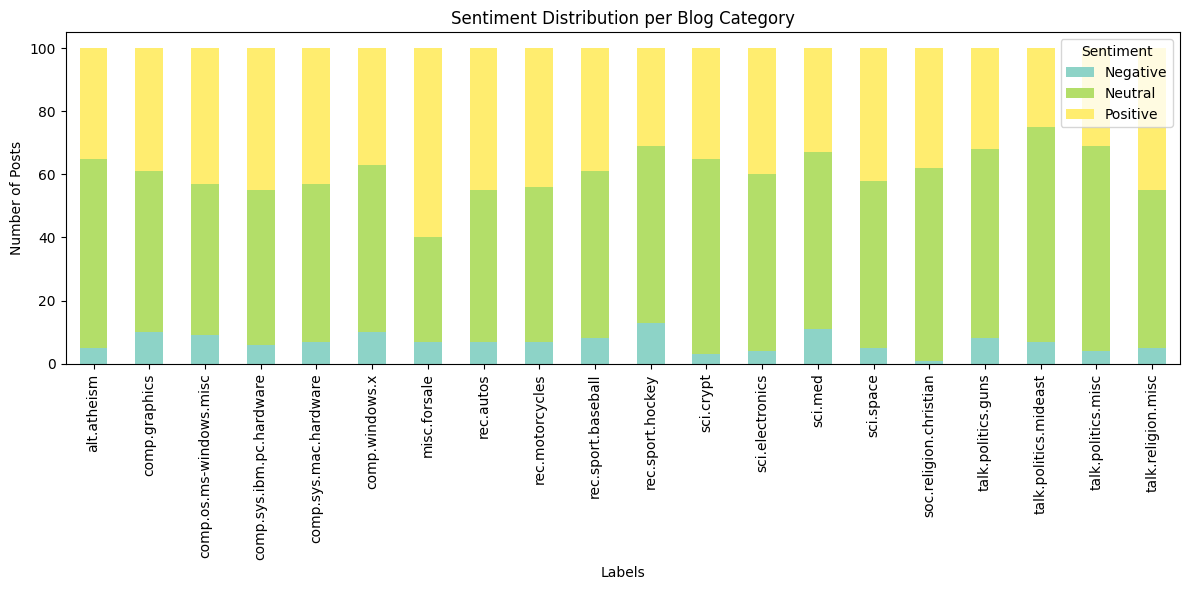

In [31]:
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title("Sentiment Distribution per Blog Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Task4: Evaluation

##### Conclusion

- The Naive Bayes classifier, trained using TF-IDF vectorization with max_features=5000, ngram_range=(1,3), analyzer='word', and norm='l2', achieved an overall accuracy of 84.39% on the test dataset.

- The classification report demonstrates that most categories were classified with high precision, recall, and F1-scores, particularly in topics like sci.crypt, rec.sport.hockey, soc.religion.christian, and comp.windows.x, where the F1-score approached or exceeded 0.90. This indicates strong predictive performance for well-defined and distinct categories.

- However, the model still struggles with overlapping or ambiguous categories like talk.religion.misc, which had a notably low F1-score of 0.35. This may be due to the presence of semantically similar content across related categories, class imbalance, or insufficient unique features to differentiate them.